<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/CNN_with_Hilbert_images_The_Master_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters

## Data Load and Selection

In [0]:
global subj_list 
global selector
subj_list = [0,0,0,0,0,0]

In [0]:
def update_subjlist(sector):

  if sector ==1:
    subj_1 = datafetch.fetch_subject(1)
    subj_2 = datafetch.fetch_subject(2)
    subj_3 = datafetch.fetch_subject(3)
    subj_4 = datafetch.fetch_subject(4)
    subj_5 = datafetch.fetch_subject(5)
    return np.array([subj_1, subj_2, subj_3, subj_4, subj_5, 1])


  if sector ==2:
    subj_6 = datafetch.fetch_subject(6)
    subj_7 = datafetch.fetch_subject(7)
    subj_8 = datafetch.fetch_subject(8)
    subj_9 = datafetch.fetch_subject(9)
    subj_10 = datafetch.fetch_subject(10)

    return np.array([0,0,0,0,0] + [subj_6, subj_7, subj_8, subj_9, subj_10, 2])


  if sector ==3:
    subj_11 = datafetch.fetch_subject(11)
    subj_12 = datafetch.fetch_subject(12)
    subj_13 = datafetch.fetch_subject(13)
    subj_14 = datafetch.fetch_subject(14)
    subj_15 = datafetch.fetch_subject(15)

    return np.array([0,0,0,0,0] + [0,0,0,0,0] + [subj_11, subj_12, subj_13, subj_14, subj_15, 3])

In [0]:
## To load other sectors, you just need to simpy change the following list
## and then change the arguments of the selector design function (which are set 
## to the default values for subject 1,2,3,4,5). you just need to change the subjects
## to for example [6,10] if you want to load the subjcets number 6,7,8,9,10.
## IMPORTANT NOTE:  note that first of all, you need to uncommand the sector 
## that you want to laod its data

#subj_list = update_subjlist(1)

In [0]:
def selector_desing(sector, classes=[1,4], trail=[0,24]):
  selector = []
  for i in range((sector-1)*5+1, sector*5+1):
    for j in range(classes[0],classes[1]+1):
      for k in range(0,trail[1]+1):
        selector.append((i,j,k))
  selector = np.array(selector)
  np.random.shuffle(selector)

  return selector

In [8]:
selector = selector_desing(1, [1,4], [0,24])
selector.shape, selector

((500, 3), array([[ 4,  3, 15],
        [ 4,  4, 12],
        [ 1,  1, 23],
        ...,
        [ 4,  2, 18],
        [ 4,  2, 16],
        [ 4,  4,  3]]))

In [0]:
subj_list = update_subjlist(1)

In [0]:
def select_data(select):
  '''
  it selects the data according the the selector.
  for exmaple if the seclevto os equal to (3,4,1) the
  data of subject number 1, which belongs to the class number 4, and its 1 trail 
  will be selected. which is a 7200 data point with 63 channels
  '''
  global subj_list

  return subj_list[select[0]-1]['train_data_class{}'.format(select[1])][select[2]]


In [11]:
selector[12]

array([ 3,  2, 16])

In [12]:
test = select_data(selector[12])
test.shape

(7200, 63)

## *Hilbert Images*

In [0]:
from plotters import Hilbert_concat, Hilbert_generator, data_to_HilbertMat

In [0]:
x,y = Hilbert_generator()
x,y = Hilbert_concat(x,y)

In [0]:
def item_to_Hilbert(item):

  global selector
  global subj_list
  
  '''
  function will get item (the index of the patient) and will return the hilbert 
  images that each channel of eeg will be different channels of the retured image

  This fuction will also return the label. for example the label 1 indicates that
  the patient belongs to the class number 1
  '''
  mat = data_to_HilbertMat(x,y, select_data(selector[item])[:,0], double_factor=2)
  mat = np.expand_dims(mat, axis=2)
  mats = mat
  label = selector[item][1]
  for i in range(1,63):
    mat = data_to_HilbertMat(x,y, select_data(selector[item])[:,i], double_factor=2)
    mat = np.expand_dims(mat, axis=2)
    mats = np.concatenate((mats, mat), axis=2)

  return mats, label

In [0]:
image1, label  = item_to_Hilbert(12)

In [17]:
image1.shape, label

((64, 128, 63), 2)

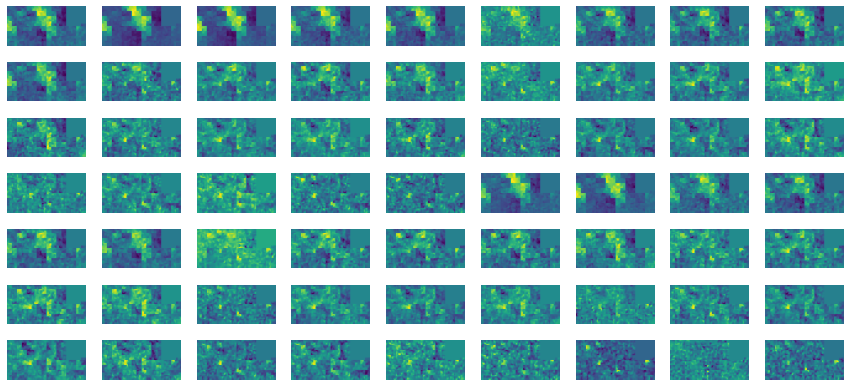

In [18]:
fig = plt.figure(figsize=(15,7))
for i in range(63):
  ax = fig.add_subplot(7,9,i+1)
  ax.imshow(image1[:,:,i])
  ax.axis('off')

In [0]:
def load_hilbert_batch(n=[0,30],sector=1):
  global subj_list
  global selector

  labels = []

  Data = []
  if sector != subj_list[-1]:
    subj_list = update_subjlist(sector)
    selector = selector_desing(sector)

  data, label = item_to_Hilbert(n[0])
  Data.append(data)
  labels.append(label)
  for i in range(n[0]+1, n[1]):
    data, label  = item_to_Hilbert(i)
    labels.append(label)
    Data.append(data)

  return np.array(Data), labels

In [63]:
data, label = load_hilbert_batch(n=[0,20], sector=3)
data.shape, label

((20, 64, 128, 63),
 [1, 1, 3, 4, 4, 1, 3, 4, 4, 2, 4, 2, 2, 2, 2, 3, 4, 4, 1, 3])

### So...

So up until now, You can load the data as hilbert images in which the different channels of the eeg are as the different channels of the loaded image

In [43]:
data[1][1].shape

()

#Trash


In [8]:
subj_list[-1]

((60, 7200, 63),
 (25, 7200, 63),
 (25, 7200, 63),
 (25, 7200, 63),
 (25, 7200, 63))

In [0]:
a = ['a{}'.format(i) for i in range(10)]

In [0]:
a[1] = 2

In [0]:
x='buffalo'    
exec("%s = %d" % (x,2))

In [25]:
buffalo

2

In [0]:
a1 = np.random.random((3,3))
a1 =np.expand_dims(a1, axis=2)

In [0]:
a2 = np.random.random((3,3))
a2 = np.expand_dims(a2, axis=2)

In [84]:
a1.shape , a2.shape

((3, 3, 1), (3, 3, 1))

In [0]:
a = [a1,a2]

In [0]:
a = np.concatenate((a,a2), axis=2)

In [92]:
a.shape

(3, 3, 3)

In [0]:
global a 
a = 2

In [0]:
def test():
  global a
  a =  a+12



In [0]:
test()


In [208]:
a

14

In [196]:
'b' in globals()

False